# Lab4b - Working with NASA EMIT data in HyperCoast

This notebook demonstrates how to work with NASA [Earth Surface Mineral Dust Source Investigation (EMIT)](https://lpdaac.usgs.gov/data/get-started-data/collection-overview/missions/emit-overview/) data in HyperCoast.

## Environment setup

Uncomment and run the following cell to install the required packages.

In [ ]:
#%pip install "hypercoast[extra]"

Import library.

In [2]:
import hypercoast
import xarray as xr


c:\Users\C00553090\AppData\Local\miniconda3\envs\hypercoast\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Read EMIT data

Read the downloaded EMIT data and process it as an `xarray.Dataset`. Note that the dataset has 285 bands.

In [5]:
filepath = "EMIT_L2A_RFL_001_20230220T181144_2305112_013.nc" # AP
dataset = hypercoast.read_emit(filepath)

# dataset

## Visualize EMIT data

Visualize the EMIT data on an interactive map. You can change the band combination and extract spectral profiles interactively. You can also export the spectral profiles as a CSV file.

In [6]:
m = hypercoast.Map()
m.add_basemap("SATELLITE")
m.add_emit(dataset, wavelengths=[650, 560, 442], vmin=0, vmax=0.15, layer_name="EMIT1")
m.add("spectral", xlim=(400,1000))
m

Map(center=[29.7606505, -84.8802705], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Text(0.5, 1.0, 'EMIT RGB image composite')

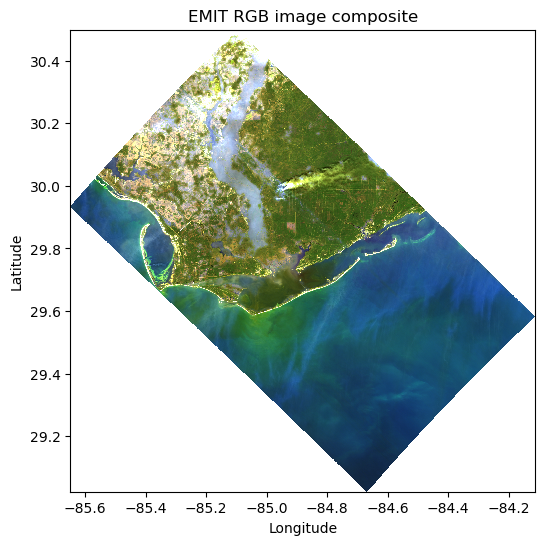

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6)) 
image = dataset['reflectance'].sel(wavelength=[665, 550, 412], method='nearest')
xr.plot.imshow(image, vmin=0, vmax=0.12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('EMIT RGB image composite')  # Customize the plot title

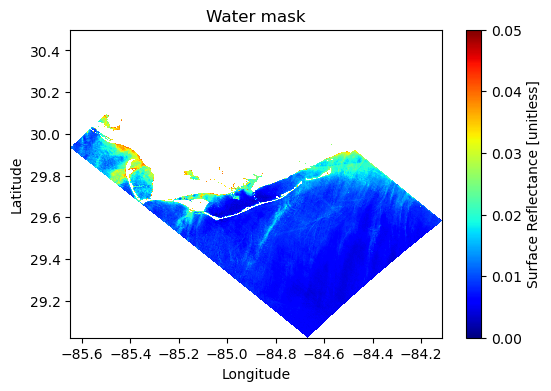

In [7]:
import matplotlib.pyplot as plt

# Mask values above 0.04 (adjust threshold as necessary)
SWIR = dataset['reflectance'].sel(wavelength=873, method='nearest')
water =SWIR.where(SWIR < 0.04)

# Plot the masked data with a custom colormap and colorbar label
plt.figure(figsize=(6, 4))
water.plot(vmin=0, vmax=0.05, cmap='jet')  # Customize colorbar label
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Water mask')  # Customize the plot title
plt.show()

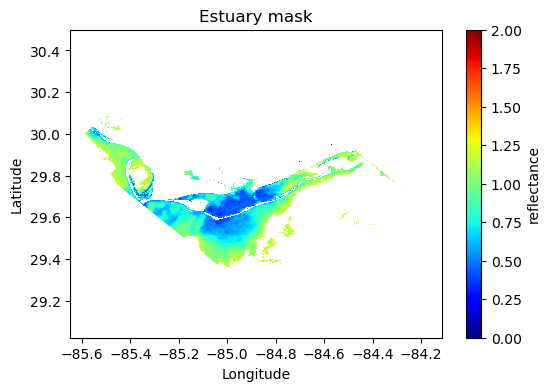

In [8]:

blue = dataset['reflectance'].sel(wavelength=440, method='nearest')
green = dataset['reflectance'].sel(wavelength=560, method='nearest')
estuary = blue/green
estuary =estuary.where((water > 0) & (estuary <1.2 ))

# Plot the masked data with a custom colormap and colorbar label
plt.figure(figsize=(6, 4))
estuary.plot(vmin=0, vmax=2, cmap='jet')  # Customize colorbar label
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Estuary mask')  # Customize the plot title
plt.show()

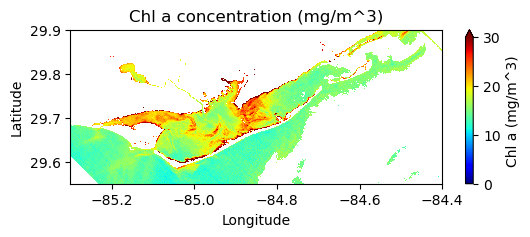

In [16]:
import matplotlib.pyplot as plt

# Assuming dataset and variables are correctly defined and loaded

# Mask values above 0.04 (adjust threshold as necessary)
NIR = dataset['reflectance'].sel(wavelength=704, method='nearest')
Red = dataset['reflectance'].sel(wavelength=674, method='nearest')
ratio = Red / NIR
chla = 19.774 * (ratio ** -2.037)
chla = chla.where((estuary > 0))

# Plot the masked data with a custom colormap and colorbar label
plt.figure(figsize=(6, 2))
chla_plot = chla.plot(vmin=0, vmax=30, cmap='jet', cbar_kwargs={'label': 'Chl a (mg/m^3)'})  # Integrate colorbar label here
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Chl a concentration (mg/m^3)')  # Customize the plot title

# Get current axis and set the limits for latitude and longitude
ax = plt.gca()
ax.set_xlim(-85.3, -84.4)
ax.set_ylim(29.55, 29.9)

plt.show()

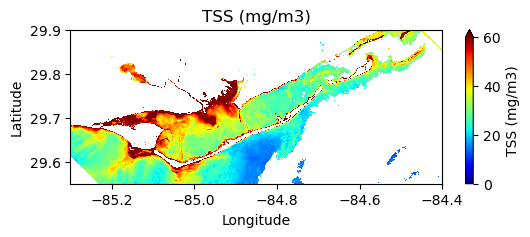

In [17]:
import matplotlib.pyplot as plt

# Assuming dataset and variables are correctly defined and loaded

# Mask values above 0.04 (adjust threshold as necessary)
Red = dataset['reflectance'].sel(wavelength=650, method='nearest')
# Adjusted equation for turbidity
turbidity = 1140 * (Red) - 1.4
turbidity = turbidity.where((estuary > 0))

# Plot the masked data with a custom colormap and colorbar label
plt.figure(figsize=(6, 2))
turbidity_plot = turbidity.plot(vmin=0, vmax=60, cmap='jet', cbar_kwargs={'label': 'TSS (mg/m3)'})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('TSS (mg/m3)')  # Customize the plot title

# Get current axis and set the limits for latitude and longitude
ax = plt.gca()
ax.set_xlim(-85.3, -84.4)
ax.set_ylim(29.55, 29.9)

plt.show()